In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel("/kaggle/input/dataset-cdc/train(1).xlsx")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [5]:
# id is not a meaningful feature
df = df.drop('id',axis=1)

In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df = df[['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price']]

In [8]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,20150505T000000,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240,268643
1,20140708T000000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605,245000
2,20150115T000000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455,200000
3,20150427T000000,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750,352499
4,20141205T000000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071,232000


In [9]:
df.dtypes

date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [10]:
df['date']

0        20150505T000000
1        20140708T000000
2        20150115T000000
3        20150427T000000
4        20141205T000000
              ...       
16204    20141113T000000
16205    20141111T000000
16206    20140930T000000
16207    20140620T000000
16208    20150325T000000
Name: date, Length: 16209, dtype: object

### Extracting meaningful features from 'date' 

In [11]:
def process_date_features(df):
    # 1. Converting the string "20150505T000000" to a Datetime Object
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
    
    # 2. Extracting meaningful features
    df['sales_year'] = df['date'].dt.year
    df['sales_month'] = df['date'].dt.month
    
    # 3. Calculating Age features (Crucial for value)
    df['house_age'] = df['sales_year'] - df['yr_built']
    
    # Handling renovations: If never renovated (0), use yr_built
    df['yr_renovated_filled'] = df['yr_renovated'].replace(0, pd.NA).fillna(df['yr_built'])
    df['years_since_reno'] = df['sales_year'] - df['yr_renovated_filled']

    # 4. Droping the original column (and temporary columns) to clean up
    df = df.drop(columns=['date', 'yr_renovated_filled'])
    
    return df

In [12]:
df = process_date_features(df)

/tmp/ipykernel_864/1147298732.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['yr_renovated_filled'] = df['yr_renovated'].replace(0, pd.NA).fillna(df['yr_built'])


In [13]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,sales_year,sales_month,house_age,years_since_reno
0,4,2.25,1810,9240,2.0,0,0,3,7,1810,...,98055,47.4362,-122.187,1660,9240,268643,2015,5,54,54
1,3,2.50,1600,2788,2.0,0,0,4,7,1600,...,98031,47.4034,-122.187,1720,3605,245000,2014,7,22,22
2,4,2.50,1720,8638,2.0,0,0,3,8,1720,...,98003,47.2704,-122.313,1870,7455,200000,2015,1,21,21
3,2,2.25,1240,705,2.0,0,0,3,7,1150,...,98027,47.5321,-122.073,1240,750,352499,2015,4,6,6
4,3,2.00,1280,13356,1.0,0,0,3,7,1280,...,98042,47.3715,-122.074,1590,8071,232000,2014,12,20,20


In [14]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'sales_year', 'sales_month',
       'house_age', 'years_since_reno'],
      dtype='object')

In [15]:
df = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month',
       'house_age', 'years_since_reno', 'price']]

In [16]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month,house_age,years_since_reno,price
0,4,2.25,1810,9240,2.0,0,0,3,7,1810,...,98055,47.4362,-122.187,1660,9240,2015,5,54,54,268643
1,3,2.50,1600,2788,2.0,0,0,4,7,1600,...,98031,47.4034,-122.187,1720,3605,2014,7,22,22,245000
2,4,2.50,1720,8638,2.0,0,0,3,8,1720,...,98003,47.2704,-122.313,1870,7455,2015,1,21,21,200000
3,2,2.25,1240,705,2.0,0,0,3,7,1150,...,98027,47.5321,-122.073,1240,750,2015,4,6,6,352499
4,3,2.00,1280,13356,1.0,0,0,3,7,1280,...,98042,47.3715,-122.074,1590,8071,2014,12,20,20,232000


In [17]:
# Removing 'zipcode' column as we already have lattitude and longitude

df = df.drop('zipcode',axis=1)

In [18]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sales_year', 'sales_month', 'house_age',
       'years_since_reno', 'price'],
      dtype='object')

### EDA among Features

In [19]:
# 1. Target
target = 'price'

# 2. Continuous / Numerical
num_cols = [
    'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
    'lat', 'long', 'sqft_living15', 'sqft_lot15', 
    'house_age', 'years_since_reno', 'yr_built', 'yr_renovated'
]

# 3. Discrete / Categorical
cat_cols = [
    'bedrooms', 'bathrooms', 'floors', 'waterfront', 
    'view', 'condition', 'grade', 'sales_year', 'sales_month'
]

## Numerical vs. Numerical (Correlation & Clashes)

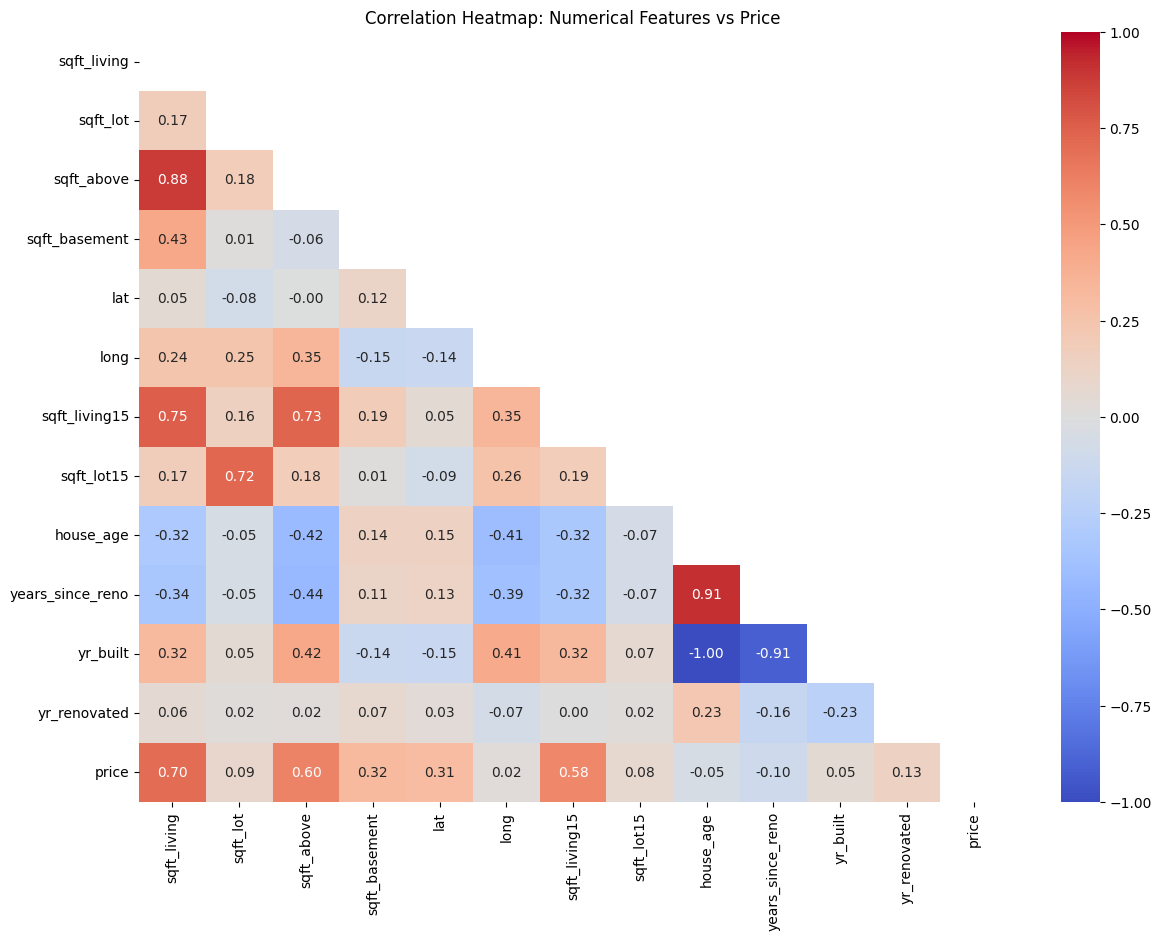

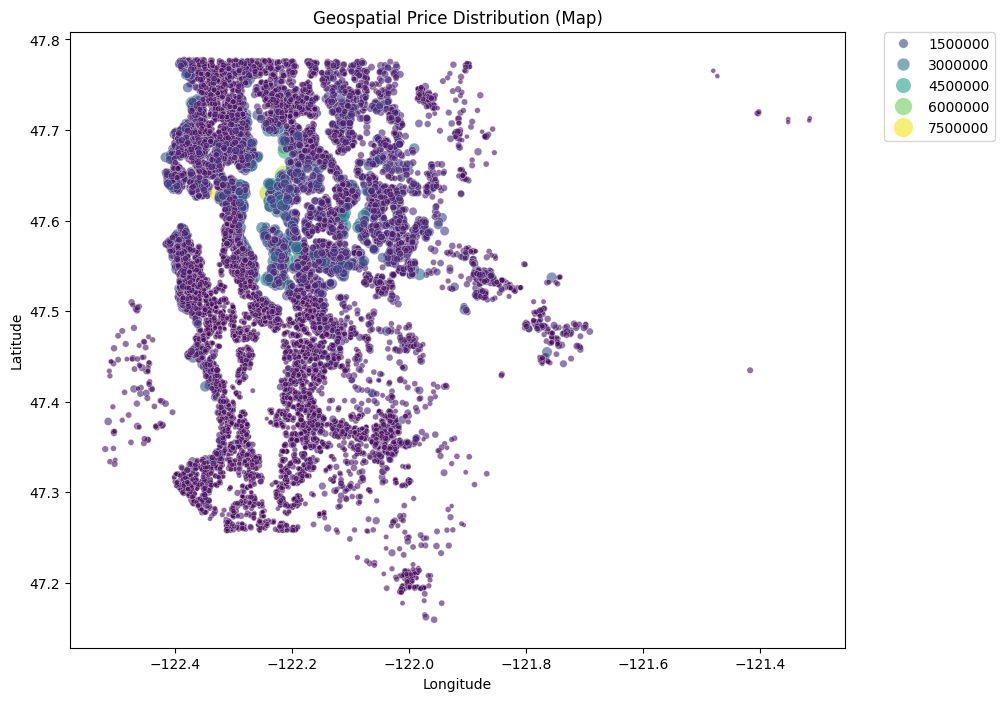

In [20]:
# Goal: Checking which numbers drive price and which numbers are duplicates of each other (Multicollinearity).

# Visuals: Heatmap & Pair Plots.

# Correlation matrix
# "strength" of relationships (-1 to 1)
plt.figure(figsize=(14, 10))
corr_matrix = df[num_cols + [target]].corr()

# Masking the upper triangle to make it cleaner
mask =  np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap: Numerical Features vs Price")
plt.show()

# Spatial Analysis (Lat/Long vs Price) 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='long', y='lat', hue='price', 
                palette='viridis', alpha=0.6, size='price', sizes=(10, 200))
plt.title("Geospatial Price Distribution (Map)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [21]:
# Based on  Heatmap analysis
# features_to_drop :
#    'yr_built',      # Redundant with house_age (-1.00 correlation)
#    'sqft_above',    # Redundant with sqft_living (0.88 correlation)
#   'sqft_living15', # highly correlated with sqft_living (0.75)

In [22]:
df = df.drop(['yr_built','sqft_above','sqft_living15'],axis=1)

In [23]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'lat', 'long', 'sqft_lot15', 'sales_year',
       'sales_month', 'house_age', 'years_since_reno', 'price'],
      dtype='object')

## Categorical vs. Numerical (Quality vs. Price)

/tmp/ipykernel_864/2500326041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='grade', y='price', ax=axes[0, 0], palette='magma')
/tmp/ipykernel_864/2500326041.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='view', y='price', ax=axes[0, 1], palette='cool')
/tmp/ipykernel_864/2500326041.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='waterfront', y='price', ax=axes[1, 0], palette='Set2')
/tmp/ipykernel_864/2500326041.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

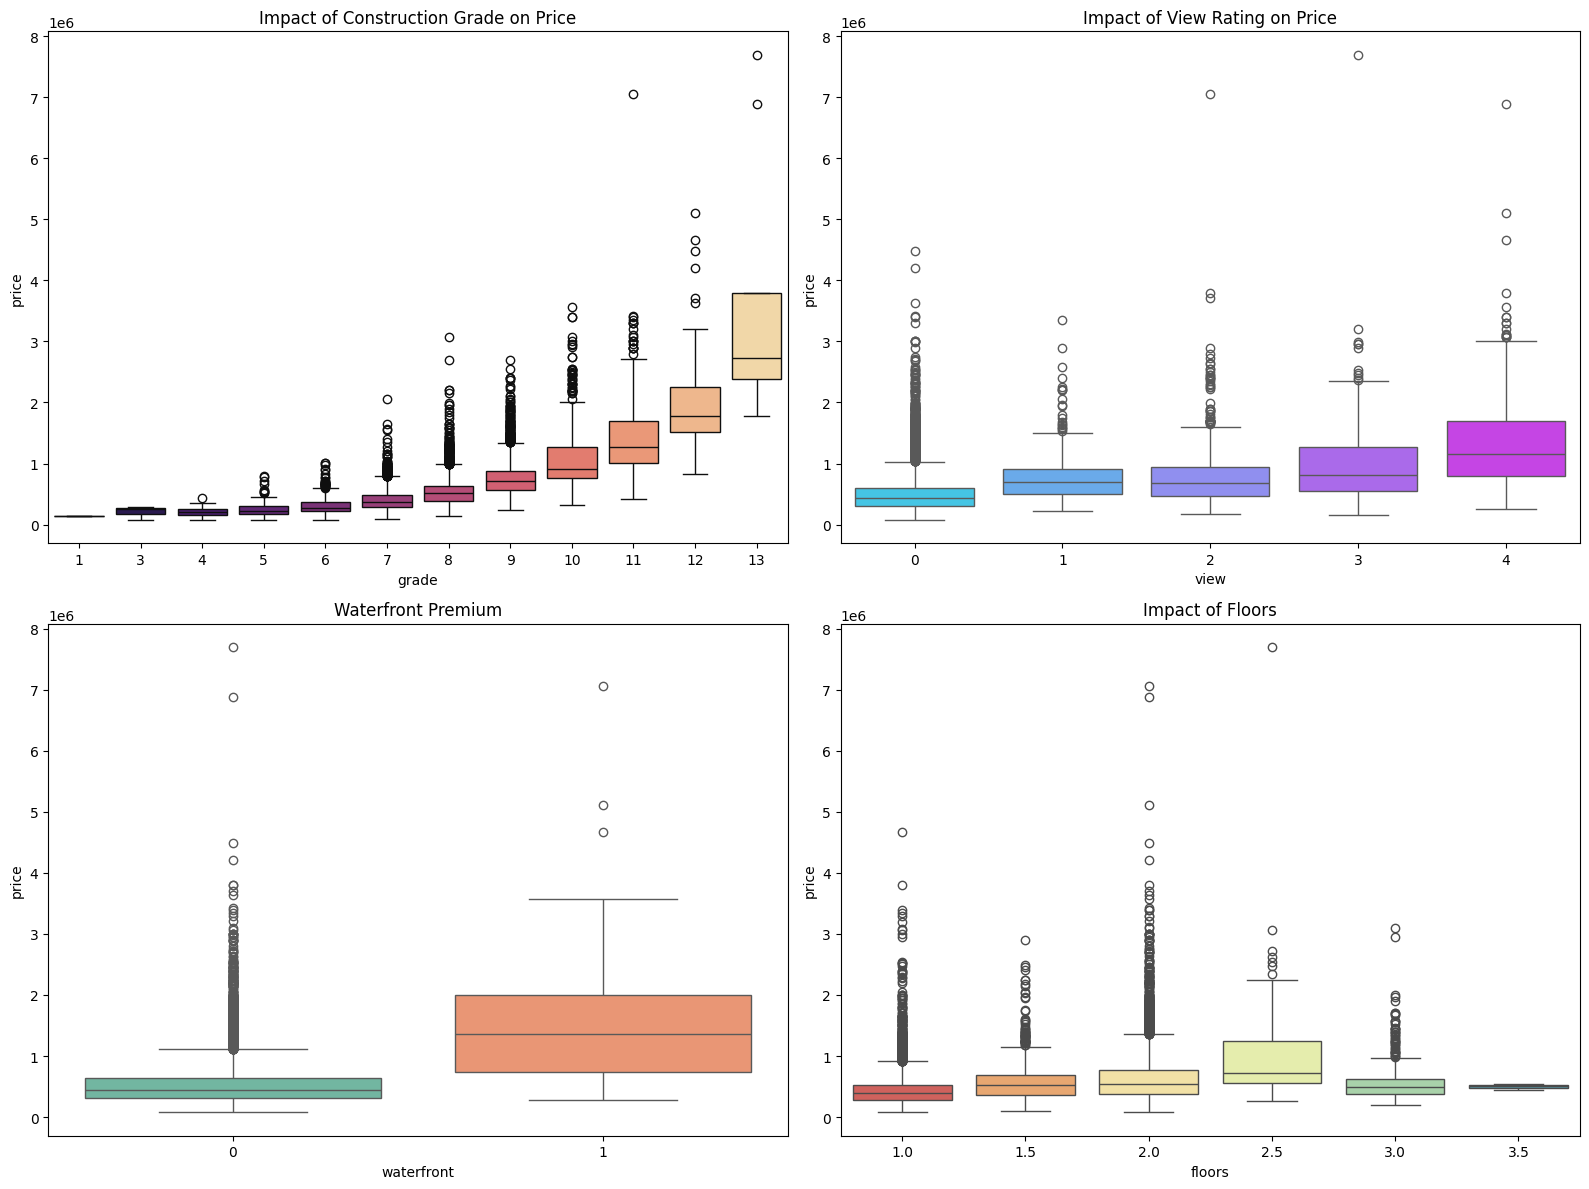

In [24]:
# Goal: To see if "higher rating" always equals "higher price."

# Visuals: Box Plots are best here.

# Quality & Condition Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Grade vs Price (Does construction quality matter?)
sns.boxplot(data=df, x='grade', y='price', ax=axes[0, 0], palette='magma')
axes[0, 0].set_title('Impact of Construction Grade on Price')

# View vs Price (Do views add value?)
sns.boxplot(data=df, x='view', y='price', ax=axes[0, 1], palette='cool')
axes[0, 1].set_title('Impact of View Rating on Price')

# Waterfront vs Price (The "Premium" Check)
sns.boxplot(data=df, x='waterfront', y='price', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Waterfront Premium')

# Floors vs Price
sns.boxplot(data=df, x='floors', y='price', ax=axes[1, 1], palette='Spectral')
axes[1, 1].set_title('Impact of Floors')

plt.tight_layout()
plt.show()

## Categorical vs. Categorical (Relationships)

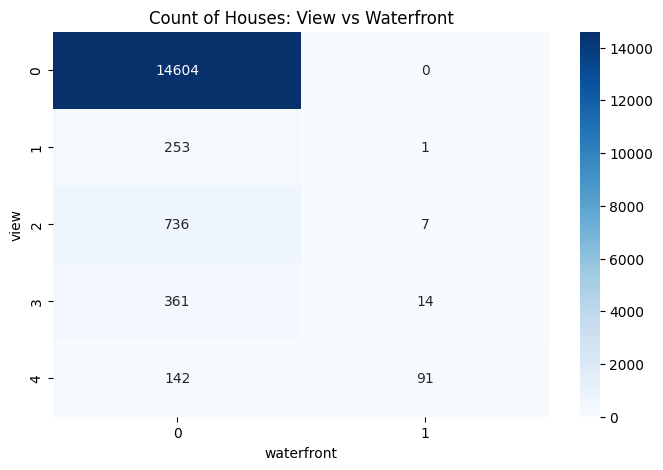

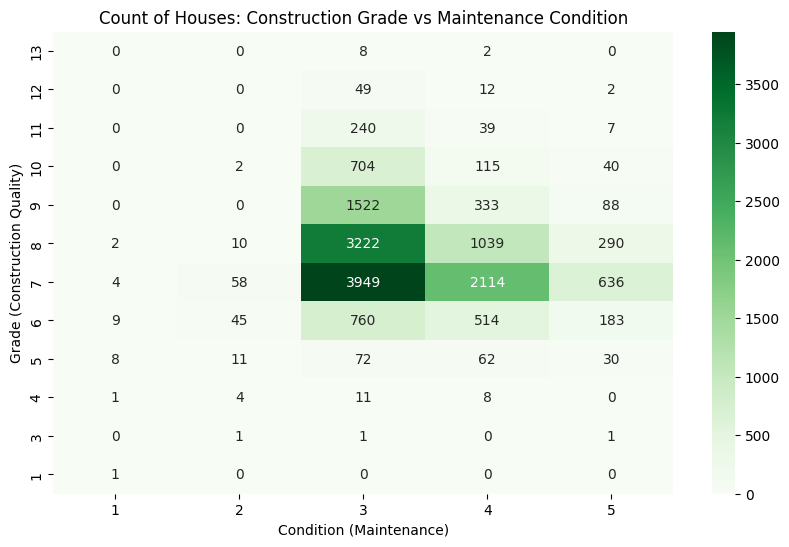

In [27]:
# Goal: To see how house features relate. For example, do houses with good views also have high grades?

# Visuals: Heatmaps of Crosstabs (Counts).

# View vs Waterfront
# Are all waterfront houses considered to have a 'good view'?
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df['view'], df['waterfront']), annot=True, fmt='d', cmap='Blues')
plt.title("Count of Houses: View vs Waterfront")
plt.show()

# Condition vs Grade
# Do high-grade houses always have good condition? (Not necessarily!)
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['grade'], df['condition']), annot=True, fmt='d', cmap='Greens')
plt.title("Count of Houses: Construction Grade vs Maintenance Condition")
plt.xlabel("Condition (Maintenance)")
plt.ylabel("Grade (Construction Quality)")
plt.gca().invert_yaxis() # high grades at the top
plt.show()

In [26]:
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'lat', 'long', 'sqft_lot15', 'sales_year',
       'sales_month', 'house_age', 'years_since_reno', 'price'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler

target_col = 'price'
feature_cols = [c for c in df.columns if c != target_col]

X_train = df[feature_cols].values
y_train = df[target_col].values

# Normalization (Standard Scaling)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [32]:
# Preparing test data

x_test = pd.read_excel('/kaggle/input/dataset-cdc/test2.xlsx')

In [33]:
x_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [34]:
x_test = process_date_features(x_test)

/tmp/ipykernel_864/1147298732.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['yr_renovated_filled'] = df['yr_renovated'].replace(0, pd.NA).fillna(df['yr_built'])


In [35]:
x_test = x_test.drop('zipcode',axis=1)

In [36]:
x_test = x_test.drop(['yr_built','sqft_above','sqft_living15'],axis=1)

In [40]:
x_test.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'lat', 'long', 'sqft_lot15', 'sales_year',
       'sales_month', 'house_age', 'years_since_reno'],
      dtype='object')

In [42]:
id = x_test['id']

In [43]:
x_test = x_test.drop('id',axis=1)

In [44]:
x_test_scaled = scaler.transform(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [48]:
# Saving the final results

import os

save_path = '/kaggle/working/processed_data/'
os.makedirs(save_path, exist_ok=True)

# 2. Saving the Numerical Arrays (.npz is fast and compact)
np.savez(
    os.path.join(save_path, 'dataset.npz'), 
    X_train=X_train_scaled, 
    y_train=y_train, 
    x_test=x_test_scaled
)

# 3. Saving the ID Series
# Converting to DataFrame to save as CSV easily

pd.DataFrame(id).to_csv(os.path.join(save_path, 'test_ids.csv'), index=False, header=['id'])